In [ ]:
import pickle
with open('./drift_history_1756745257.9618719.pkl','rb') as f:
    data=pickle.load(f)
with open('./drift_history_1756745164.7965853.pkl','rb') as f:
    data_2=pickle.load(f)

import numpy as np
data=np.array(data)
data_2=np.array(data_2)


Text(0.5, 1.0, 'Histogram of errors')

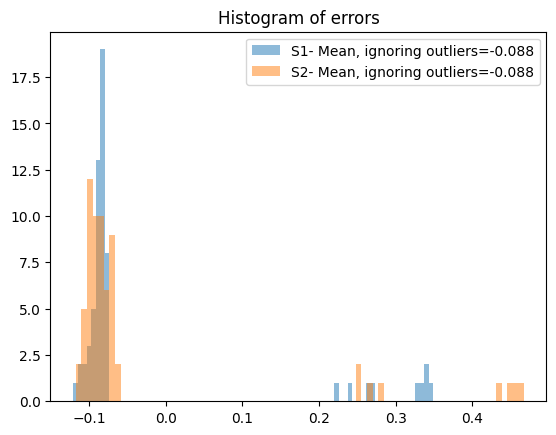

In [39]:
import matplotlib.pyplot as plt
plt.hist(data,bins=80,label=f'S1- Mean, ignoring outliers={np.mean(data[np.where(data<0)[0]]):0.3f}',alpha=0.5)
plt.hist(data_2,bins=80,label=f'S2- Mean, ignoring outliers={np.mean(data_2[np.where(data_2<0)[0]]):0.3f}',alpha=0.5)
plt.legend()
plt.title('Histogram of errors')

In [62]:
import pickle
with open('./est_mode_1756745741.0671923.pkl','rb') as f:
    est_mode=pickle.load(f)
with open('./estimated_x_history_1756745741.091398.pkl','rb') as f:
    est_x=pickle.load(f)
with open('./history_modes_real_1756745741.0683286.pkl','rb') as f:
    history_modes_real=pickle.load(f)
with open('./real_x_history_1756745741.0901833.pkl','rb') as f:
    real_x=pickle.load(f)

with open('../est_mode_1756745475.0401828.pkl','rb') as f:
    est_mode_2=pickle.load(f)

with open('../history_modes_real_1756745475.0414665.pkl','rb') as f:
    history_modes_real_2=pickle.load(f)



est_mode=np.array(est_mode)

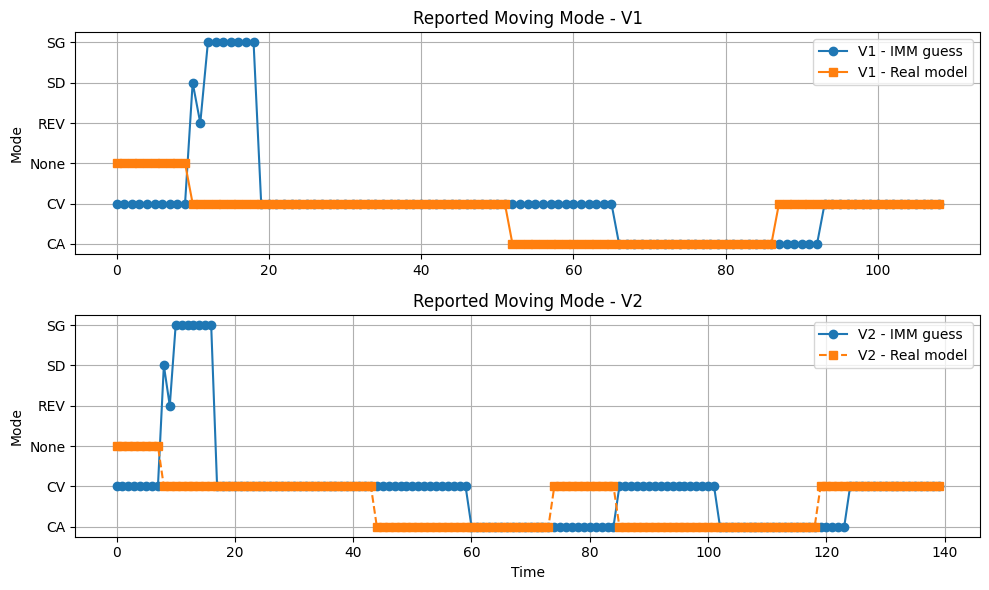

In [63]:
import matplotlib.pyplot as plt
import numpy as np

# Example label arrays (replace with your actual data)
labels1 = est_mode
labels2 = history_modes_real
labels3 = est_mode_2
labels4 = history_modes_real_2

# Clean None values
labels1 = list(labels1)
labels2_clean = ['None' if label is None else label for label in labels2]
labels3 = list(labels3)
labels4_clean = ['None' if label is None else label for label in labels4]

# Unified category mapping
categories = sorted(set(labels1 + labels2_clean + labels3 + labels4_clean))
label_map = {label: idx for idx, label in enumerate(categories)}

# Convert to numeric
y1 = [label_map[label] for label in labels1]
y2 = [label_map[label] for label in labels2_clean]
y3 = [label_map[label] for label in labels3]
y4 = [label_map[label] for label in labels4_clean]
x_1 = np.arange(len(labels1))
x_2 = np.arange(len(labels3))

# Create subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 6), sharey=True)

# Plot V1
ax1.plot(x_1, y1, 'o-', label='V1 - IMM guess')
ax1.plot(x_1, y2, 's-', label='V1 - Real model')
ax1.set_ylabel('Mode')
ax1.set_title('Reported Moving Mode - V1')
ax1.legend()
ax1.grid(True)

# Plot V2
ax2.plot(x_2, y3, 'o-', label='V2 - IMM guess')
ax2.plot(x_2, y4, 's--', label='V2 - Real model')
ax2.set_xlabel('Time')
ax2.set_ylabel('Mode')
ax2.set_title('Reported Moving Mode - V2')
ax2.legend()
ax2.grid(True)

# Shared y-axis ticks
ax2.set_yticks(range(len(categories)))
ax2.set_yticklabels(categories)

plt.tight_layout()
plt.show()